In [1]:
import os
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import seaborn as sns

In [37]:
shots = pd.read_csv('.data/shots.csv')
shots.loc[:, 'freeze_frame'] = shots.loc[:, 'freeze_frame'].apply(ast.literal_eval)
shots.head()

,minute,player_name,team_name,play_pattern_name,position_name,under_pressure,x_start,y_start,follows_dribble,first_time,open_goal,statsbomb_xg,type,technique,body_part,outcome,end_loc,freeze_frame
0,7,Lucy Quinn,Tottenham Hotspur Women,Regular Play,Right Wing,0,95.9,58.9,0,0,0,0.013642,Open Play,Normal,Left Foot,Saved,"[{'end_loc': [116.7, 44.9, 1.2]}]","[{'freeze_frame': [{'location': [119.6, 42.3],..."
1,10,Rianna Dean,Tottenham Hotspur Women,From Free Kick,Center Forward,0,106.1,54.3,0,0,0,0.040844,Open Play,Normal,Right Foot,Off T,"[{'end_loc': [120.0, 41.6, 4.2]}]","[{'freeze_frame': [{'location': [118.8, 43.2],..."
2,11,Angela Addison,Tottenham Hotspur Women,From Free Kick,Left Wing,1,110.0,28.2,0,0,0,0.136871,Open Play,Normal,Left Foot,Saved,"[{'end_loc': [117.6, 36.7, 0.4]}]","[{'freeze_frame': [{'location': [111.3, 39.8],..."
3,13,Kit Graham,Tottenham Hotspur Women,From Throw In,Center Attacking Midfield,0,113.2,40.4,0,0,0,0.124624,Open Play,Normal,Head,Post,"[{'end_loc': [120.0, 37.9, 2.9]}]","[{'freeze_frame': [{'location': [105.8, 46.6],..."
4,16,Kit Graham,Tottenham Hotspur Women,From Counter,Center Attacking Midfield,0,95.2,39.8,0,0,0,0.023807,Open Play,Normal,Left Foot,Post,"[{'end_loc': [120.0, 37.3, 2.9]}]","[{'freeze_frame': [{'location': [97.8, 49.4], ..."


In [38]:
def ff_unpacking(players):
    players = players[0]['freeze_frame']
    for i in players:
        if i['position']['name'] == 'Goalkeeper' and i['teammate'] == False:
            gk_loc = i['location']
            return gk_loc

In [39]:
# only leave 'Open Play' shots (that are not directly from Free Kick, Corner, Penalty, Kick Off)
shots = shots.loc[shots.loc[:, 'type'] == 'Open Play', :].reset_index(drop = True)
shots.loc[:, 'gk_loc'] = shots.loc[:, 'freeze_frame'].apply(lambda x: ff_unpacking(x))

In [40]:
shots.loc[shots.loc[:, 'gk_loc'].isnull(), 'gk_loc']
# 42 None type situations

2189     None
3642     None
4533     None
5368     None
5370     None
5371     None
5372     None
5557     None
5558     None
5559     None
5638     None
5911     None
5936     None
5941     None
6053     None
6111     None
6397     None
6431     None
6433     None
6998     None
7199     None
7494     None
7511     None
7526     None
7531     None
7546     None
7810     None
7963     None
8063     None
8087     None
8126     None
8203     None
8345     None
8410     None
8454     None
8466     None
8476     None
8564     None
8651     None
8829     None
9209     None
10970    None
Name: gk_loc, dtype: object

In [50]:
none_gk = shots.loc[:, 'freeze_frame'][5941]
#shots.iloc[5941, :]

In [9]:
ff_locs = pd.DataFrame()
for i in none_gk[0]['freeze_frame']:
    ff_locs = pd.concat([ff_locs, pd.json_normalize(i)])
ff_locs = ff_locs.reset_index(drop = True)
ff_locs.loc[:, 'x'] = ff_locs.loc[:, 'location'].apply(lambda x: x[0])
ff_locs.loc[:, 'y'] = ff_locs.loc[:, 'location'].apply(lambda x: x[1])
ff_locs = ff_locs.drop(columns = 'location')
ff_locs

,teammate,player.id,player.name,position.id,position.name,x,y
0,True,18146,Leanne Kiernan,22,Right Center Forward,87.0,38.0
1,True,18150,Julia Simic,13,Right Center Midfield,93.0,34.0
2,True,4653,Jane Ross,16,Left Midfield,102.0,46.0
3,False,19779,Rhiannon Roberts,14,Center Midfield,96.0,38.0
4,False,15618,Jasmine Matthews,5,Left Center Back,99.0,44.0
5,False,15630,Leigh-Anne Robe,6,Left Back,93.0,51.0
6,True,18158,Rebecca Leigh Spencer,1,Goalkeeper,118.0,40.0
7,False,15629,Satara Murray,2,Right Back,106.0,32.0
8,False,15614,Sophie Elizabeth Bradley-Auckland,3,Right Center Back,107.0,36.0


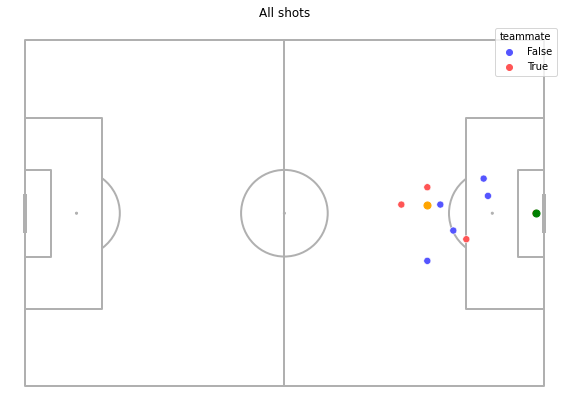

In [36]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))

sns.scatterplot(data = ff_locs, x = 'x', y = 'y', ax = ax, hue = 'teammate',
                palette = 'seismic', s = 50)

ax.scatter(ff_locs.loc[6, 'x'], ff_locs.loc[6, 'y'], c = 'green', s = 50)

ax.scatter(shots.loc[5941, 'x_start'], shots.loc[5941, 'y_start'], c = 'orange', s = 50)

#ax.scatter(shots.iloc[5941, :]['x_start'], shots.iloc[5941, :]['y_start'], c = 'orange', s = 50)

#ax.legend(title = 'Outcome', frameon = False, loc = 'upper left')
ax.set_title('All shots')
plt.show()

In [48]:
none_gk = shots.loc[:, 'freeze_frame'][5558]
#shots.iloc[5558, :]

In [44]:
ff_locs = pd.DataFrame()
for i in none_gk[0]['freeze_frame']:
    ff_locs = pd.concat([ff_locs, pd.json_normalize(i)])
ff_locs = ff_locs.reset_index(drop = True)
ff_locs.loc[:, 'x'] = ff_locs.loc[:, 'location'].apply(lambda x: x[0])
ff_locs.loc[:, 'y'] = ff_locs.loc[:, 'location'].apply(lambda x: x[1])
ff_locs = ff_locs.drop(columns = 'location')
ff_locs

,teammate,player.id,player.name,position.id,position.name,x,y
0,True,15550,Bethany England,21,Left Wing,114.0,49.0
1,True,19422,Jessica Carter,2,Right Back,116.0,46.0
2,True,4638,Drew Spence,22,Right Center Forward,115.0,42.0
3,True,17273,Adelina Engman,17,Right Wing,102.0,43.0
4,True,4641,Francesca Kirby,24,Left Center Forward,115.0,32.0
5,True,4633,Magdalena Lilly Eriksson,5,Left Center Back,115.0,36.0
6,True,10395,Maren Nævdal Mjelde,10,Center Defensive Midfield,119.0,1.0


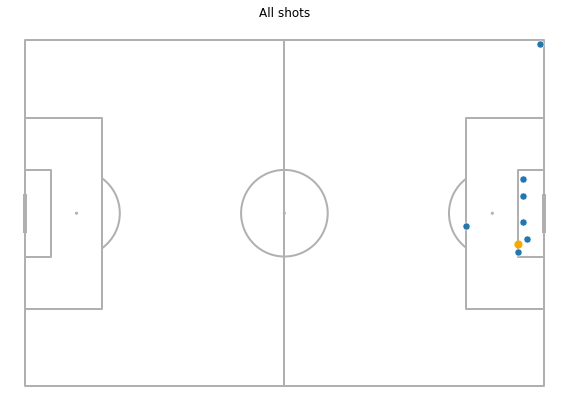

In [47]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))

sns.scatterplot(data = ff_locs, x = 'x', y = 'y', ax = ax,
                palette = 'seismic', s = 50)

#ax.scatter(ff_locs.loc[6, 'x'], ff_locs.loc[6, 'y'], c = 'green', s = 50)

ax.scatter(shots.loc[5558, 'x_start'], shots.loc[5558, 'y_start'], c = 'orange', s = 50)

#ax.scatter(shots.iloc[5941, :]['x_start'], shots.iloc[5941, :]['y_start'], c = 'orange', s = 50)

#ax.legend(title = 'Outcome', frameon = False, loc = 'upper left')
ax.set_title('All shots')
plt.show()

In [53]:
none_gk = shots.loc[:, 'freeze_frame'][8063     ]
shots.iloc[8063, :]

minute                                                              53
player_name                                        Samantha June Mewis
team_name                                       North Carolina Courage
play_pattern_name                                         Regular Play
position_name                                    Right Center Midfield
under_pressure                                                       0
x_start                                                           99.0
y_start                                                           17.0
follows_dribble                                                      0
first_time                                                           0
open_goal                                                            0
statsbomb_xg                                                  0.069716
type                                                         Open Play
technique                                                       Normal
body_p

In [52]:
ff_locs = pd.DataFrame()
for i in none_gk[0]['freeze_frame']:
    ff_locs = pd.concat([ff_locs, pd.json_normalize(i)])
ff_locs = ff_locs.reset_index(drop = True)
ff_locs.loc[:, 'x'] = ff_locs.loc[:, 'location'].apply(lambda x: x[0])
ff_locs.loc[:, 'y'] = ff_locs.loc[:, 'location'].apply(lambda x: x[1])
ff_locs = ff_locs.drop(columns = 'location')
ff_locs

,teammate,player.id,player.name,position.id,position.name,x,y
0,False,4963,Yuki Nagasato,21,Left Wing,88.0,12.0
1,False,4965,Nikki Stanton,10,Center Defensive Midfield,97.0,16.0
2,False,4942,Arin Wright,2,Right Back,106.0,16.0
3,False,4955,Sarah Gorden,3,Right Center Back,103.0,21.0
4,False,4957,Lauren Kaskie,13,Right Center Midfield,102.0,27.0
5,False,5103,Michele Vasconcelos,15,Left Center Midfield,93.0,27.0
6,False,5101,Samantha Johnson,5,Left Center Back,104.0,30.0
7,False,5105,Sofia Huerta,6,Left Back,105.0,43.0
8,True,5047,Jaelene McKenzie Daniels,6,Left Back,101.0,3.0
9,True,5055,Lynn Raenie Williams,22,Right Center Forward,107.0,34.0


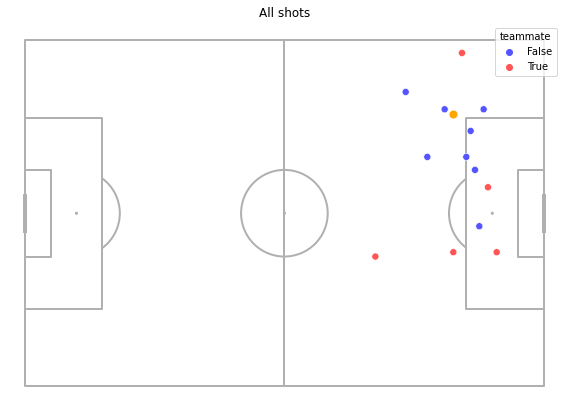

In [55]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))

sns.scatterplot(data = ff_locs, x = 'x', y = 'y', ax = ax, hue = 'teammate',
                palette = 'seismic', s = 50)

#ax.scatter(ff_locs.loc[6, 'x'], ff_locs.loc[6, 'y'], c = 'green', s = 50)

ax.scatter(shots.loc[8063, 'x_start'], shots.loc[8063, 'y_start'], c = 'orange', s = 50)

#ax.scatter(shots.iloc[5941, :]['x_start'], shots.iloc[5941, :]['y_start'], c = 'orange', s = 50)

#ax.legend(title = 'Outcome', frameon = False, loc = 'upper left')
ax.set_title('All shots')
plt.show()

In [56]:
#6998
none_gk = shots.loc[:, 'freeze_frame'][6998]
shots.iloc[6998, :]

minute                                                              67
player_name                                             Kayleigh Green
team_name                                   Brighton & Hove Albion WFC
play_pattern_name                                         Regular Play
position_name                                Center Attacking Midfield
under_pressure                                                       0
x_start                                                           87.0
y_start                                                           48.0
follows_dribble                                                      0
first_time                                                           0
open_goal                                                            0
statsbomb_xg                                                  0.055308
type                                                         Open Play
technique                                                  Half Volley
body_p

In [57]:
ff_locs = pd.DataFrame()
for i in none_gk[0]['freeze_frame']:
    ff_locs = pd.concat([ff_locs, pd.json_normalize(i)])
ff_locs = ff_locs.reset_index(drop = True)
ff_locs.loc[:, 'x'] = ff_locs.loc[:, 'location'].apply(lambda x: x[0])
ff_locs.loc[:, 'y'] = ff_locs.loc[:, 'location'].apply(lambda x: x[1])
ff_locs = ff_locs.drop(columns = 'location')
ff_locs

,teammate,player.id,player.name,position.id,position.name,x,y
0,True,16393,Ellie Brazil,17,Right Wing,81.0,61.0
1,True,16378,Iniabasi Anefiok Umotong,23,Center Forward,93.0,52.0
2,True,16374,Aileen Whelan,21,Left Wing,88.0,26.0
3,False,15629,Satara Murray,2,Right Back,91.0,28.0
4,False,15614,Sophie Elizabeth Bradley-Auckland,3,Right Center Back,95.0,49.0
5,False,15630,Leigh-Anne Robe,6,Left Back,93.0,54.0
6,False,19417,Amy Rodgers,11,Left Defensive Midfield,82.0,44.0
7,False,15622,Leandra Little,5,Left Center Back,74.0,49.0


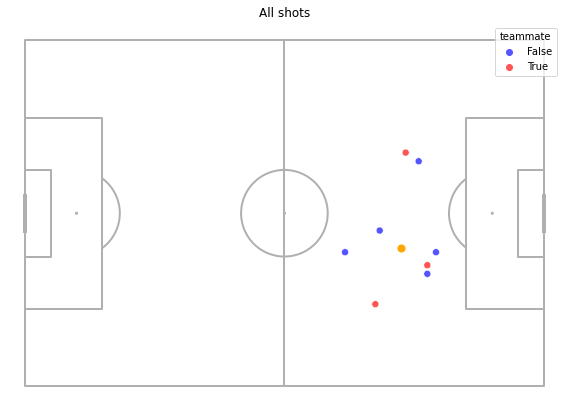

In [58]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))

sns.scatterplot(data = ff_locs, x = 'x', y = 'y', ax = ax, hue = 'teammate',
                palette = 'seismic', s = 50)

#ax.scatter(ff_locs.loc[6, 'x'], ff_locs.loc[6, 'y'], c = 'green', s = 50)

ax.scatter(shots.loc[6998, 'x_start'], shots.loc[6998, 'y_start'], c = 'orange', s = 50)

#ax.scatter(shots.iloc[5941, :]['x_start'], shots.iloc[5941, :]['y_start'], c = 'orange', s = 50)

#ax.legend(title = 'Outcome', frameon = False, loc = 'upper left')
ax.set_title('All shots')
plt.show()

In [60]:
#7526
none_gk = shots.loc[:, 'freeze_frame'][7526]
shots.iloc[7526, :]

minute                                                              59
player_name                                               Bethany Mead
team_name                                                  Arsenal WFC
play_pattern_name                                         Regular Play
position_name                                            Left Midfield
under_pressure                                                       0
x_start                                                           99.0
y_start                                                           52.0
follows_dribble                                                      0
first_time                                                           0
open_goal                                                            0
statsbomb_xg                                                  0.072232
type                                                         Open Play
technique                                                       Normal
body_p

In [61]:
ff_locs = pd.DataFrame()
for i in none_gk[0]['freeze_frame']:
    ff_locs = pd.concat([ff_locs, pd.json_normalize(i)])
ff_locs = ff_locs.reset_index(drop = True)
ff_locs.loc[:, 'x'] = ff_locs.loc[:, 'location'].apply(lambda x: x[0])
ff_locs.loc[:, 'y'] = ff_locs.loc[:, 'location'].apply(lambda x: x[1])
ff_locs = ff_locs.drop(columns = 'location')
ff_locs

,teammate,player.id,player.name,position.id,position.name,x,y
0,False,15569,Kerys Harrop,6,Left Back,100.8,50.6
1,False,19503,Aoife Mannion,5,Left Center Back,101.0,44.0
2,True,15623,Vivianne Miedema,23,Center Forward,96.1,42.7
3,True,10658,Danielle van de Donk,13,Right Center Midfield,100.5,34.2
4,False,19502,Meaghan Sargeant,3,Right Center Back,99.4,33.2


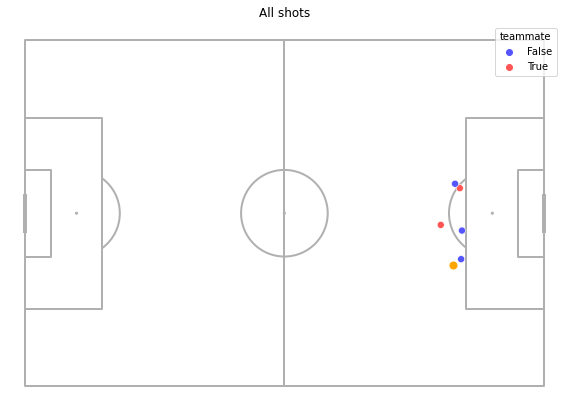

In [62]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))

sns.scatterplot(data = ff_locs, x = 'x', y = 'y', ax = ax, hue = 'teammate',
                palette = 'seismic', s = 50)

#ax.scatter(ff_locs.loc[6, 'x'], ff_locs.loc[6, 'y'], c = 'green', s = 50)

ax.scatter(shots.loc[7526, 'x_start'], shots.loc[7526, 'y_start'], c = 'orange', s = 50)

#ax.scatter(shots.iloc[5941, :]['x_start'], shots.iloc[5941, :]['y_start'], c = 'orange', s = 50)

#ax.legend(title = 'Outcome', frameon = False, loc = 'upper left')
ax.set_title('All shots')
plt.show()

In [83]:
#9209
none_gk = shots.loc[:, 'freeze_frame'][9209]
shots.iloc[9209, :]

minute                                                              33
player_name                                               Bethany Mead
team_name                                              England Women's
play_pattern_name                                         Regular Play
position_name                                               Right Wing
under_pressure                                                       1
x_start                                                          113.2
y_start                                                           41.1
follows_dribble                                                      0
first_time                                                           0
open_goal                                                            0
statsbomb_xg                                                  0.240804
type                                                         Open Play
technique                                                       Normal
body_p

In [84]:
ff_locs = pd.DataFrame()
for i in none_gk[0]['freeze_frame']:
    ff_locs = pd.concat([ff_locs, pd.json_normalize(i)])
ff_locs = ff_locs.reset_index(drop = True)
ff_locs.loc[:, 'x'] = ff_locs.loc[:, 'location'].apply(lambda x: x[0])
ff_locs.loc[:, 'y'] = ff_locs.loc[:, 'location'].apply(lambda x: x[1])
ff_locs = ff_locs.drop(columns = 'location')
ff_locs

,teammate,player.id,player.name,position.id,position.name,x,y
0,False,25466,Vilde Bøe Risa,9,Right Defensive Midfield,110.7,34.9
1,False,25728,Karina Sævik,12,Right Midfield,95.9,34.1
2,True,31538,Mary Alexandra Earps,1,Goalkeeper,118.8,40.9
3,True,15555,Lauren Hemp,21,Left Wing,100.6,66.9
4,True,4641,Francesca Kirby,19,Center Attacking Midfield,109.6,34.0
5,True,4643,Georgia Stanway,9,Right Defensive Midfield,94.0,50.5
6,False,10514,Guro Reiten,16,Left Midfield,91.3,57.4
7,False,191851,Julie Blakstad,6,Left Back,101.1,60.5
8,False,24374,Ingrid Syrstad Engen,11,Left Defensive Midfield,102.9,55.3
9,False,10395,Maren Nævdal Mjelde,3,Right Center Back,112.1,56.8


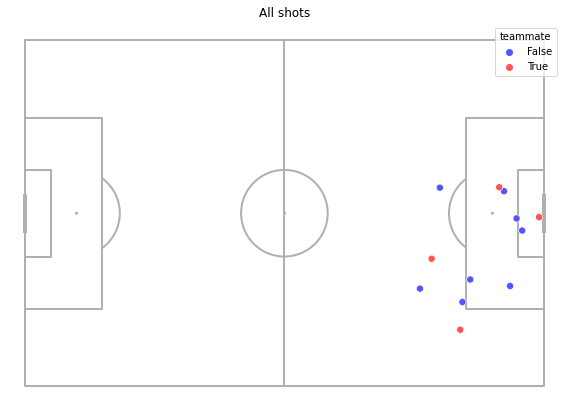

In [86]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))

sns.scatterplot(data = ff_locs, x = 'x', y = 'y', ax = ax, hue = 'teammate',
                palette = 'seismic', s = 50)

#ax.scatter(ff_locs.loc[6, 'x'], ff_locs.loc[6, 'y'], c = 'green', s = 50)

#ax.scatter(shots.loc[9209, 'x_start'], shots.loc[9209, 'y_start'], c = 'orange', s = 50)

#ax.scatter(shots.iloc[5941, :]['x_start'], shots.iloc[5941, :]['y_start'], c = 'orange', s = 50)

#ax.legend(title = 'Outcome', frameon = False, loc = 'upper left')
ax.set_title('All shots')
plt.show()

In [71]:
#10970
none_gk = shots.loc[:, 'freeze_frame'][10970]
shots.iloc[10970, :]

minute                                                              54
player_name                                              Lieke Martens
team_name                                          Netherlands Women's
play_pattern_name                                       From Free Kick
position_name                                                Left Wing
under_pressure                                                       0
x_start                                                          102.8
y_start                                                           25.2
follows_dribble                                                      0
first_time                                                           0
open_goal                                                            0
statsbomb_xg                                                  0.071345
type                                                         Open Play
technique                                                       Normal
body_p

In [72]:
ff_locs = pd.DataFrame()
for i in none_gk[0]['freeze_frame']:
    ff_locs = pd.concat([ff_locs, pd.json_normalize(i)])
ff_locs = ff_locs.reset_index(drop = True)
ff_locs.loc[:, 'x'] = ff_locs.loc[:, 'location'].apply(lambda x: x[0])
ff_locs.loc[:, 'y'] = ff_locs.loc[:, 'location'].apply(lambda x: x[1])
ff_locs = ff_locs.drop(columns = 'location')
ff_locs

,teammate,player.id,player.name,position.id,position.name,x,y
0,False,10208,Elena Linari,5,Left Center Back,109.9,41.1
1,False,10366,Sara Gama,3,Right Center Back,107.4,34.4
2,False,10228,Manuela Giugliano,15,Left Center Midfield,103.6,28.5
3,False,25770,Lisa Boattin,2,Right Back,103.8,23.8
4,False,10225,Aurora Galli,13,Right Center Midfield,103.7,19.2
5,False,10213,Alia Guagni,6,Left Back,110.0,47.6
6,False,10398,Valentina Cernoia,16,Left Midfield,103.7,45.3
7,False,10206,Daniela Sabatino,24,Left Center Forward,92.0,23.1
8,False,25544,Valentina Bergamaschi,12,Right Midfield,90.8,33.8
9,True,15623,Vivianne Miedema,23,Center Forward,106.0,36.9


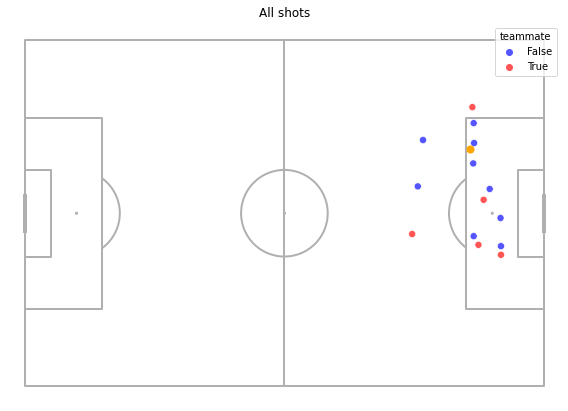

In [74]:
# Visual shots on Pitch
pitch = Pitch(pitch_type = 'statsbomb')  
fig, ax = pitch.draw(figsize=(8, 10))

sns.scatterplot(data = ff_locs, x = 'x', y = 'y', ax = ax, hue = 'teammate',
                palette = 'seismic', s = 50)

#ax.scatter(ff_locs.loc[6, 'x'], ff_locs.loc[6, 'y'], c = 'green', s = 50)

ax.scatter(shots.loc[10970, 'x_start'], shots.loc[10970, 'y_start'], c = 'orange', s = 50)

#ax.scatter(shots.iloc[5941, :]['x_start'], shots.iloc[5941, :]['y_start'], c = 'orange', s = 50)

#ax.legend(title = 'Outcome', frameon = False, loc = 'upper left')
ax.set_title('All shots')
plt.show()

In [81]:
# 8345     None
# 8410     None
# 8454     None
# 8466     None
# 8476     None
# 8564     None
# 8651     None
# 8829     None
# 9209     None
# 10970    None
none_gk = shots.loc[:, 'freeze_frame'][9209]
shots.iloc[8829, :]

minute                                                              80
player_name                                         Meghan Klingenberg
team_name                                              Portland Thorns
play_pattern_name                                         Regular Play
position_name                                                Left Back
under_pressure                                                       0
x_start                                                          115.0
y_start                                                           39.0
follows_dribble                                                      0
first_time                                                           0
open_goal                                                            0
statsbomb_xg                                                  0.332273
type                                                         Open Play
technique                                                       Normal
body_p

In [89]:
# https://youtu.be/lVGiGZN2gdw?t=41 B.Mead England vs Norway header goal 

shots.loc[shots.loc[:, 'gk_loc'].isnull(), :].shape

(42, 19)

In [90]:
shots.shape

(11085, 19)

In [94]:
shots.loc[~shots.loc[:, 'gk_loc'].isnull(), :].shape

(11043, 19)

In [95]:
shots = shots.loc[~shots.loc[:, 'gk_loc'].isnull(), :].reset_index(drop = True)
shots.head()

,minute,player_name,team_name,play_pattern_name,position_name,under_pressure,x_start,y_start,follows_dribble,first_time,open_goal,statsbomb_xg,type,technique,body_part,outcome,end_loc,freeze_frame,gk_loc
0,7,Lucy Quinn,Tottenham Hotspur Women,Regular Play,Right Wing,0,95.9,58.9,0,0,0,0.013642,Open Play,Normal,Left Foot,Saved,"[{'end_loc': [116.7, 44.9, 1.2]}]","[{'freeze_frame': [{'location': [119.6, 42.3],...","[119.6, 42.3]"
1,10,Rianna Dean,Tottenham Hotspur Women,From Free Kick,Center Forward,0,106.1,54.3,0,0,0,0.040844,Open Play,Normal,Right Foot,Off T,"[{'end_loc': [120.0, 41.6, 4.2]}]","[{'freeze_frame': [{'location': [118.8, 43.2],...","[118.8, 43.2]"
2,11,Angela Addison,Tottenham Hotspur Women,From Free Kick,Left Wing,1,110.0,28.2,0,0,0,0.136871,Open Play,Normal,Left Foot,Saved,"[{'end_loc': [117.6, 36.7, 0.4]}]","[{'freeze_frame': [{'location': [111.3, 39.8],...","[118.2, 36.8]"
3,13,Kit Graham,Tottenham Hotspur Women,From Throw In,Center Attacking Midfield,0,113.2,40.4,0,0,0,0.124624,Open Play,Normal,Head,Post,"[{'end_loc': [120.0, 37.9, 2.9]}]","[{'freeze_frame': [{'location': [105.8, 46.6],...","[119.3, 39.0]"
4,16,Kit Graham,Tottenham Hotspur Women,From Counter,Center Attacking Midfield,0,95.2,39.8,0,0,0,0.023807,Open Play,Normal,Left Foot,Post,"[{'end_loc': [120.0, 37.3, 2.9]}]","[{'freeze_frame': [{'location': [97.8, 49.4], ...","[118.5, 40.0]"


In [97]:
shots.to_csv('.data/shots.csv', index = False)